In [122]:
import numpy as np
import polars as pl
import matplotlib.pyplot as plt

# 1.15

In [97]:
repeat = 1_000

results = [
    np.sum([
        (np.random.rand() < 0.5)
        for _ in range(4)
    ])
    for _ in range(repeat)
]

count_event = np.sum([elem == 3 for elem in results])
print(count_event, count_event / repeat)

250 0.25


# 1.16

In [105]:
repeat = 1_000

results = [
    np.sum([
        (np.random.rand() < 0.75)
        for _ in range(4)
    ])
    for _ in range(repeat)
]

count_event = np.sum([elem == 3 for elem in results])
print(count_event, count_event / repeat)

427 0.427


# 2.10

In [121]:
np.mean([
    np.random.normal() ** 2
    for _ in range(1_000)
])

np.float64(0.9817089453492809)

# 2.15

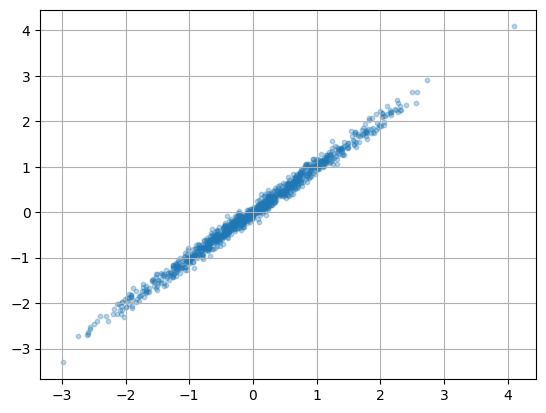

In [129]:
results = list()

for _ in range(1_000):
    x1 = np.random.normal()
    x2 = np.random.normal()

    y1 = x1 + 0.1 * x2
    y2 = x1 + 0.2 * x2

    results.append({'y1': y1, 'y2': y2})

toplot = pl.DataFrame(results)
plt.scatter(
    toplot.select('y1'),
    toplot.select('y2'),
    alpha=.3, s=10
)

plt.grid()
plt.show()
plt.close()

# 2.16

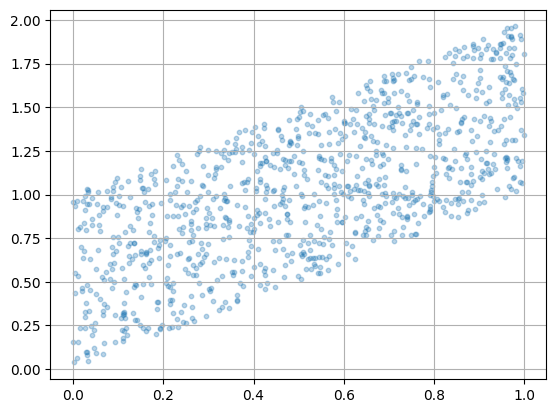

In [132]:
results = list()

for _ in range(1_000):
    u1 = np.random.uniform()
    u2 = np.random.uniform()

    x1 = u1
    x2 = u1 + u2



    results.append({'x1': x1, 'x2': x2})

toplot = pl.DataFrame(results)
plt.scatter(
    toplot.select('x1'),
    toplot.select('x2'),
    alpha=.3, s=10
)

plt.grid()
plt.show()
plt.close()

# 3.37

In [133]:
def factorial(n: int):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)

In [138]:
def factorial_approx(n: int):
    return np.sqrt(2 * np.pi) * np.power(n, n + (1/2)) * np.exp(-1 * n)

In [151]:
factorial(10), factorial_approx(10)

(3628800, np.float64(3598695.6187410355))

In [152]:
np.log(factorial(10)), np.log(factorial_approx(10))

(np.float64(15.104412573075516), np.float64(15.096082009642153))

# 3.50

In [215]:
batch = 1_000
subsample = 100
good_min = 95
good_prob = 0.95

experiments = 10_000

results = list()

for _ in range(experiments):
    batch_obs = np.random.uniform(size=batch) < good_prob
    batch_good = np.sum(batch_obs) >= 0.95 * batch
    subsample_ids = np.random.choice(batch, size=subsample, replace=True)
    subsample_good = np.sum(batch_obs[subsample_ids]) >= good_min

    results.append({'batch': batch_good, 'subsample': subsample_good})

totest = (
    pl.DataFrame(results)
    .cast({'batch': pl.Boolean, 'subsample': pl.Boolean})
)

good_rejected = (
    totest
    .filter(pl.col('batch'), ~pl.col('subsample'))
    .shape[0]
)

goods = totest.filter(pl.col('batch')).shape[0]

print('good_rejected:', good_rejected / goods)

bad_accepted = (
    totest
    .filter(~pl.col('batch'), pl.col('subsample'))
    .shape[0]
)

bads = totest.filter(~pl.col('batch')).shape[0]

print('bad_accepted:', bad_accepted / bads)

good_rejected: 0.28690807799442897
bad_accepted: 0.5109425785482123


In [216]:
batch = 1_000
subsample = 100
good_min = 98
good_prob = 0.95

experiments = 10_000

results = list()

for _ in range(experiments):
    batch_obs = np.random.uniform(size=batch) < good_prob
    batch_good = np.sum(batch_obs) >= 0.95 * batch
    subsample_ids = np.random.choice(batch, size=subsample, replace=True)
    subsample_good = np.sum(batch_obs[subsample_ids]) >= good_min

    results.append({'batch': batch_good, 'subsample': subsample_good})

totest = (
    pl.DataFrame(results)
    .cast({'batch': pl.Boolean, 'subsample': pl.Boolean})
)

good_rejected = (
    totest
    .filter(pl.col('batch'), ~pl.col('subsample'))
    .shape[0]
)

goods = totest.filter(pl.col('batch')).shape[0]

print('good_rejected:', good_rejected / goods)

bad_accepted = (
    totest
    .filter(~pl.col('batch'), pl.col('subsample'))
    .shape[0]
)

bads = totest.filter(~pl.col('batch')).shape[0]

print('bad_accepted:', bad_accepted / bads)

good_rejected: 0.8294965375257346
bad_accepted: 0.07966502039939875


#

---